In [103]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

%matplotlib inline

# Physical constants

In [104]:
q0 = 1.6e-19 # electron charge in Coulomb
eV = 1.6e-19 # electron volt in Jouls

# Hyper-parameters

In [105]:
box_size = 20 # size of the box for taking moving box average
steady_state_reached = 20 # time step in which the steady state is reached

directory = "/Users/amirhossein/research/exciton_monte_carlo"

# read the current data

length of current array: 10
particle current density[m^-2*second^-1] = 2.06e+27


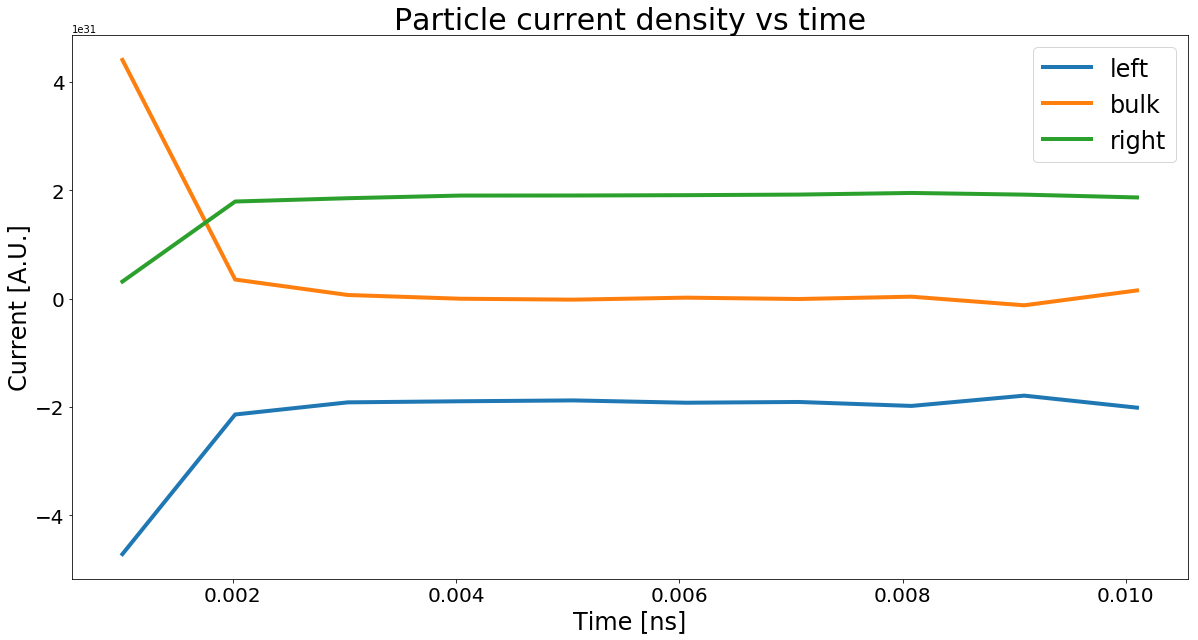

In [165]:
def plot_current(directory, box_size=1, color=None, ax=None):
    if (ax is None):
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(1,1,1)
    filename = os.path.join(directory, "region_current.dat")
    current = np.loadtxt(filename)
    time = current[:,0]
    current = current[:,1:]
    print("length of current array: {}".format(current.shape[0]))
    
    assert (current.shape[0] > box_size), "box_size must be smaller than the number of time steps: {}".format(current.shape[0])

    # calculate and plot box average of the data
    box = np.ones(box_size)
    smooth_current = np.zeros((current.shape[0]-box.shape[0]+1,current.shape[1]))
    for i in range(0,current.shape[1]):
        smooth_current[:,i] = np.convolve(current[:,i], box, mode='valid')/np.sum(box)
        
    ax.plot(time[:smooth_current.shape[0]]*1.e9,(smooth_current[:,:]), linewidth=4, color=color)
    ax.set_title("Particle current density vs time",fontsize=30)
    ax.set_xlabel("Time [ns]",fontsize=24)
    ax.set_ylabel("Current [A.U.]",fontsize=24)
    ax.tick_params(labelsize=20)
#     ax.set_xlim([0,0.3])
    ax.legend(["left","bulk","right"],fontsize=24)
    # ax.set_ylim([-2e29,2e29])
    return ax


plot_current(directory)

assert (current.shape[0] > steady_state_reached), "size of current array is smaller than parameter steady_state_reached"
avg_current = np.mean(current[steady_state_reached:,:],0)
avg_current = np.mean([abs(avg_current[0]), abs(avg_current[-1])])

print("particle current density[m^-2*second^-1] = {:0.2e}".format(avg_current))

# Population profile

population profile filename: /Users/amirhossein/research/exciton_monte_carlo/population_profile.dat
gradient of population density [m^-4] = 9.542734538784068e+33
diffusion coefficient [m^2/second] = 2.1562101910922938e-07


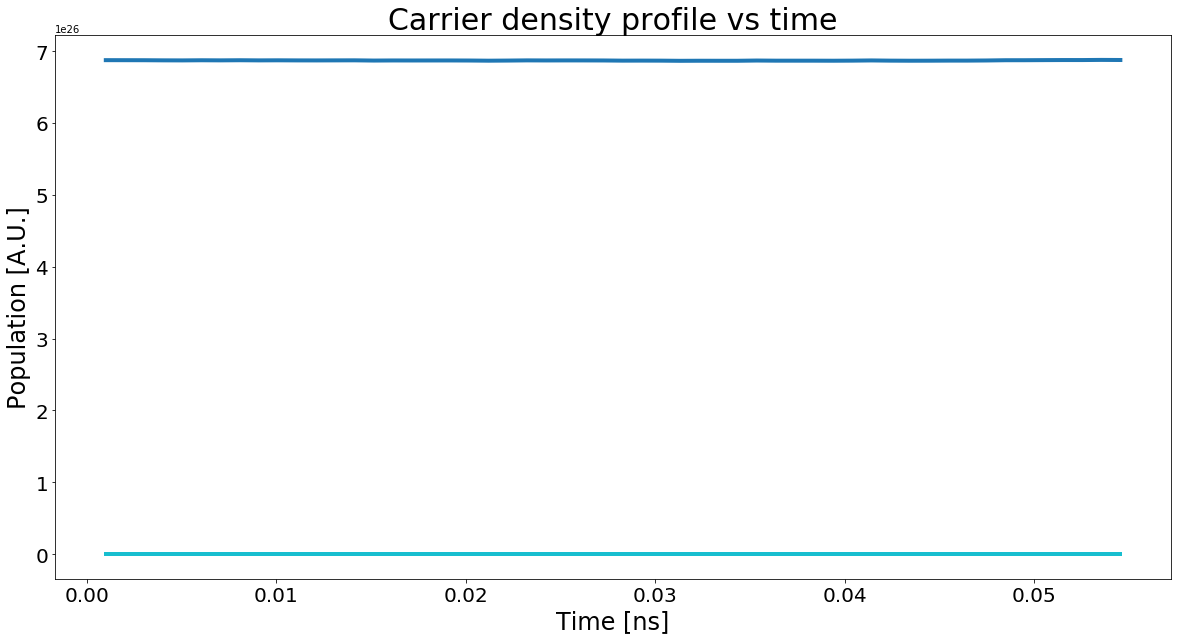

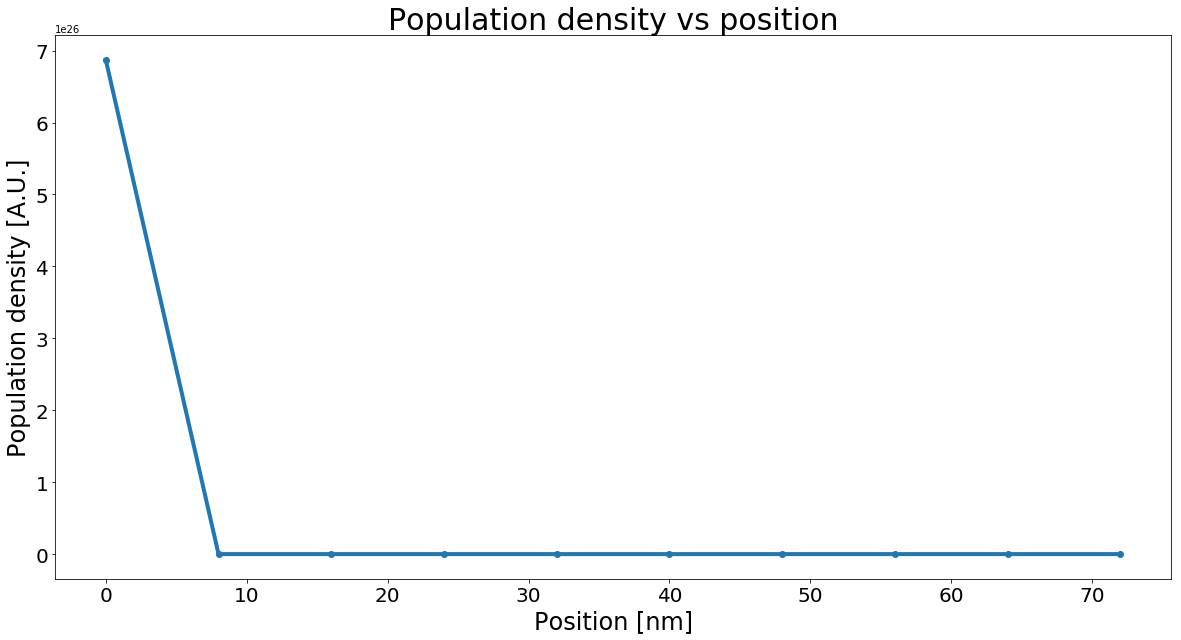

In [160]:
# directory = "/Users/amirhossein/research/exciton_monte_carlo"
filename = os.path.join(directory,"population_profile.dat")
print("population profile filename: {}".format(filename))

population = np.loadtxt(filename)
distance = population[0,1:]
time = population[1:,0]
population = population[1:,1:]

box = np.ones(box_size)
smooth_population = np.zeros((population.shape[0]-box.shape[0]+1,population.shape[1]))
for i in range(0,population.shape[1]):
    smooth_population[:,i] = np.convolve(population[:,i], box, mode='valid')/np.sum(box)

plt.figure(figsize=(20,10))
plt.plot(time[:smooth_population.shape[0]]*1.e9,smooth_population, linewidth=4)
plt.title("Carrier density profile vs time",fontsize=30)
plt.xlabel("Time [ns]",fontsize=24)
plt.ylabel("Population [A.U.]",fontsize=24)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)

avg_population = np.mean(population[steady_state_reached:,:],0)
plt.figure(figsize=(20,10))
plt.plot(distance*1.e9, avg_population, linewidth=4, marker='o')
plt.title("Population density vs position", fontsize=30)
plt.xlabel("Position [nm]",fontsize=24)
plt.ylabel("Population density [A.U.]",fontsize=24)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)

grad_population = abs((avg_population[0]-avg_population[-1])/(distance[-1]-distance[0]))
print("gradient of population density [m^-4] = {}".format(grad_population))
print("diffusion coefficient [m^2/second] = {}".format(avg_current/grad_population))

# plt.show()


# Plot current data for multiple simulations

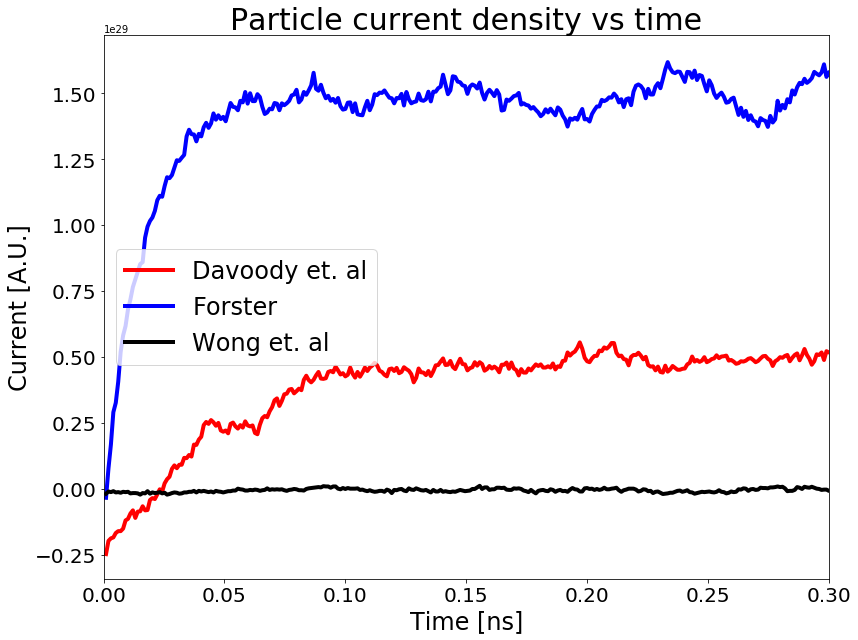

In [101]:
def plot_current(directory, box_size=20,color=None):
    filename = os.path.join(directory, "region_current.dat")
    current = np.loadtxt(filename)
    time = current[:,0]
    current = current[:,1:]
    
    assert (current.shape[0] > box_size), "box_size must be smaller than the number of time steps: {}".format(current.shape[0])

    # calculate and plot box average of the data
    box = np.ones(box_size)
    smooth_current = np.zeros((current.shape[0]-box.shape[0]+1,current.shape[1]))
    for i in range(0,current.shape[1]):
        smooth_current[:,i] = np.convolve(current[:,i], box, mode='valid')/np.sum(box)
        
    plt.plot(time[:smooth_current.shape[0]]*1.e9,(smooth_current[:,2]), linewidth=4, color=color)
    plt.title("Particle current density vs time",fontsize=30)
    plt.xlabel("Time [ns]",fontsize=24)
    plt.ylabel("Current [A.U.]",fontsize=24)
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.xlim([0,0.3])
#     plt.ylim([-2e29,2e29])

plt.figure(figsize=(13,10))

box_size = 20

plot_current("/Users/amirhossein/research/exciton_monte_carlo_davoody", box_size, color="red")
plot_current("/Users/amirhossein/research/exciton_monte_carlo_forster", box_size, color="blue")
plot_current("/Users/amirhossein/research/exciton_monte_carlo_wong", box_size, color="black")

plt.legend(["Davoody et. al", "Forster", "Wong et. al"], fontsize=24)